# Diversification and Portfolio Volatility

This notebook demonstrates how adding uncorrelated assets (orthogonal return streams) affects portfolio volatility.

We start with a **1-asset portfolio** and gradually add assets up to **20 assets**, observing how diversification reduces risk.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Create a Single Asset Portfolio

We begin with one asset that follows a normal distribution.

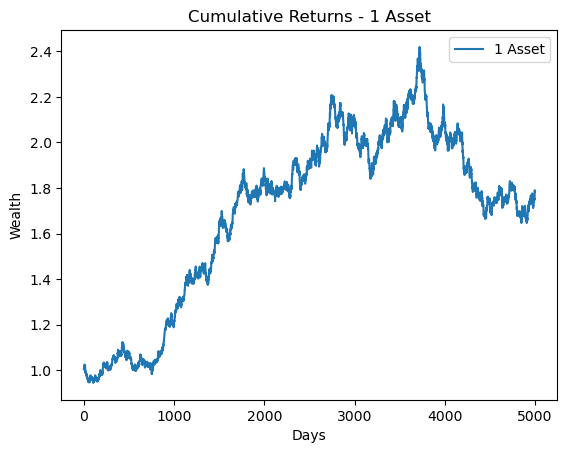

In [41]:
np.random.seed(42)
mean_daily_return = 0.0001
daily_volatility = 0.005
num_days = 5000

primary_returns = np.random.normal(loc=mean_daily_return, scale=daily_volatility, size=num_days)
primary_cum_returns = (1 + primary_returns).cumprod()

plt.plot(primary_cum_returns, label="1 Asset")
plt.title("Cumulative Returns - 1 Asset")
plt.xlabel("Days")
plt.ylabel("Wealth")
plt.legend()
plt.show()

## **Adding an Orthogonal Asset to a Portfolio**

In this section, we introduce a **second asset** that is **uncorrelated** (orthogonal) to the first asset and analyze how it affects portfolio returns.

### **Step 1: Generate a Random Independent Return Stream**
We start by generating a second asset with a normal distribution:

$$
r_2 \sim \mathcal{N}(\mu, \sigma)
$$

where:
- $ \mu $ is the mean daily return (`mean_daily_return`)
- $ \sigma $ is the daily volatility (`daily_volatility`)
- The returns are drawn independently for each trading day.

### **Step 2: Orthogonalizing the Second Asset**
To ensure that our second asset is **orthogonal** (uncorrelated) to the first, we apply the **Gram-Schmidt process**.

We first compute the **projection** of the second asset ($ r_2 $) onto the first asset ($ r_1 $):

$$
\text{proj}_{r_1}(r_2) = \frac{r_1 \cdot r_2}{r_1 \cdot r_1} r_1
$$

where $ r_1 \cdot r_2 $ represents the dot product of the two return vectors.

Next, we subtract this projection from $ r_2 $ to remove any component of $ r_2 $ that is correlated with $ r_1 $:

$$
r_2^{\perp} = r_2 - \text{proj}_{r_1}(r_2)
$$

This ensures that $ r_2^{\perp} $ is **orthogonal** to $ r_1 $, meaning:

$$
r_1 \cdot r_2^{\perp} = 0
$$

### **Step 3: Rescaling to Maintain Statistical Properties**
Although $ r_2^{\perp} $ is now orthogonal to $ r_1 $, its mean and standard deviation may have changed. We **rescale** it back to match the desired mean and volatility:

1. Adjust the mean to $ \mu $:

$$
r_2^{\perp} = r_2^{\perp} - \mathbb{E}[r_2^{\perp}] + \mu
$$

2. Scale to maintain standard deviation $ \sigma $:

$$
r_2^{\perp} = r_2^{\perp} \times \frac{\sigma}{\text{std}(r_2^{\perp})}
$$

Now, $ r_2^{\perp} $ is **both orthogonal to $ r_1 $ and follows the same statistical distribution**.

### **Step 4: Constructing a 2-Asset Portfolio**
We now construct a simple **equally weighted portfolio** with the two assets:

$$
r_p = 0.5 r_1 + 0.5 r_2^{\perp}
$$

The **cumulative return** of the portfolio is computed as:

$$
C_p = (1 + r_p).cumprod()
$$

### **Step 5: Visualizing the Diversification Effect**
We plot:
- The cumulative returns of the **1-asset portfolio** (using only $ r_1 $)
- The cumulative returns of the **2-asset portfolio** (using $ r_1 $ and $ r_2^{\perp} $)

This visualization allows us to see how adding an **uncorrelated asset** affects portfolio growth and stability.


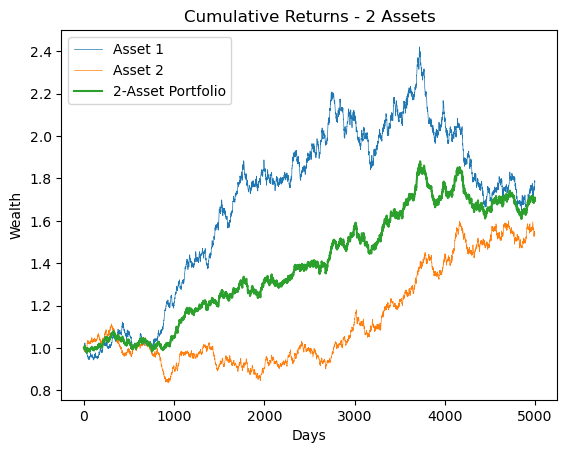

In [34]:
# Step 1: Generate a random independent return stream
second_asset_raw = np.random.normal(loc=mean_daily_return, scale=daily_volatility, size=num_days)

# Step 2: Orthogonalize the second asset relative to the first asset
dot_product = np.dot(primary_returns, second_asset_raw) / np.dot(primary_returns, primary_returns)
second_asset_orthogonal = second_asset_raw - dot_product * primary_returns

# Step 3: Rescale the second asset to match the target mean and standard deviation
second_asset_orthogonal = second_asset_orthogonal - np.mean(second_asset_orthogonal) + mean_daily_return
second_asset = second_asset_orthogonal * (daily_volatility / np.std(second_asset_orthogonal))

# Now `second_asset_orthogonal` is the second asset, orthogonal to `primary_returns`
second_asset_cum_returns = (1 + second_asset).cumprod()
weights_2 = [0.5, 0.5]
two_asset_portfolio = weights_2[0] * primary_returns + weights_2[1] * second_asset
two_asset_cum_returns = (1 + two_asset_portfolio).cumprod()

plt.plot(primary_cum_returns, label="Asset 1", linewidth=0.5)
plt.plot(second_asset_cum_returns, label="Asset 2", linewidth=0.5)
plt.plot(two_asset_cum_returns, label="2-Asset Portfolio", linewidth=1.5)
plt.title("Cumulative Returns - 2 Assets")
plt.xlabel("Days")
plt.ylabel("Wealth")
plt.legend()
plt.show()

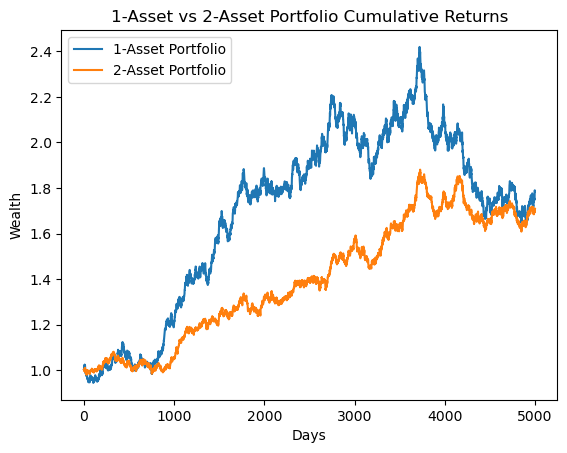

In [35]:
plt.plot(primary_cum_returns, label="1-Asset Portfolio", linewidth=1.5)
plt.plot(two_asset_cum_returns, label="2-Asset Portfolio", linewidth=1.5)
plt.title("1-Asset vs 2-Asset Portfolio Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Wealth")
plt.legend()
plt.show()

## Step 3: Add a Third Asset

Adding a third uncorrelated asset further reduces portfolio volatility.

## Function to Generate Orthogonal Assets

We define a function to generate an asset that is **uncorrelated (orthogonal)** to all previously existing assets.

In [36]:
def generate_orthogonal_asset(existing_assets, mean, std_dev, size):
    """
    Generate a new orthogonal asset relative to an existing portfolio.
    """
    new_asset = np.random.normal(loc=mean, scale=std_dev, size=size)
    
    for asset in existing_assets:
        dot_product = np.dot(asset, new_asset) / np.dot(asset, asset)
        new_asset -= dot_product * asset
    
    new_asset = new_asset - np.mean(new_asset) + mean
    new_asset = new_asset * (std_dev / np.std(new_asset))
    return new_asset

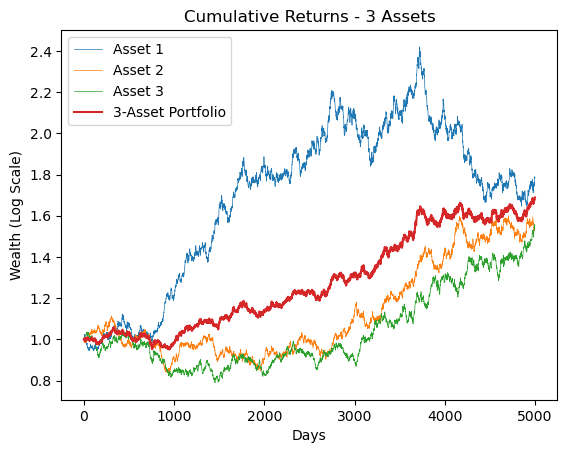

In [37]:
third_asset = generate_orthogonal_asset([primary_returns, second_asset], mean_daily_return, daily_volatility, num_days)
third_asset_cum_returns = (1 + third_asset).cumprod()
weights_3 = [1/3, 1/3, 1/3]
three_asset_portfolio = weights_3[0] * primary_returns + weights_3[1] * second_asset + weights_3[2] * third_asset
three_asset_cum_returns = (1 + three_asset_portfolio).cumprod()

plt.plot(primary_cum_returns, label="Asset 1", linewidth=0.5)
plt.plot(second_asset_cum_returns, label="Asset 2", linewidth=0.5)
plt.plot(third_asset_cum_returns, label="Asset 3", linewidth=0.5)

# plt.plot(two_asset_cum_returns, label="2 Assets", linewidth=0.5)
plt.plot(three_asset_cum_returns, label="3-Asset Portfolio", linewidth=1.5)
# plt.yscale("log")
plt.title("Cumulative Returns - 3 Assets")
plt.xlabel("Days")
plt.ylabel("Wealth (Log Scale)")
plt.legend()
plt.show()

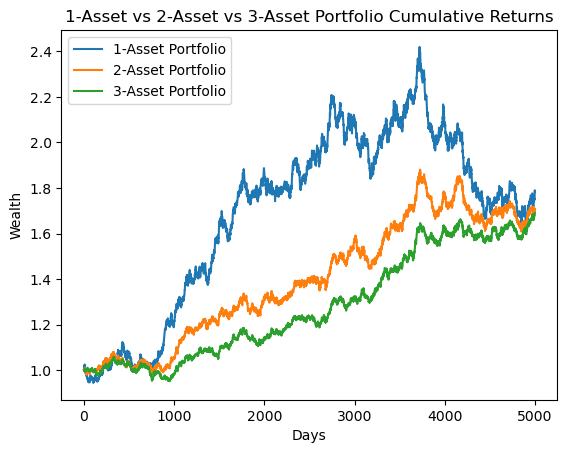

In [43]:
plt.plot(primary_cum_returns, label="1-Asset Portfolio", linewidth=1.5)
plt.plot(two_asset_cum_returns, label="2-Asset Portfolio", linewidth=1.5)
plt.plot(three_asset_cum_returns, label="3-Asset Portfolio", linewidth=1.5)

plt.title("1-Asset vs 2-Asset vs 3-Asset Portfolio Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Wealth")
plt.legend()
plt.show()

## Step 4: Generalizing to up to 20 Assets

Now, we automate the process and observe how volatility changes.

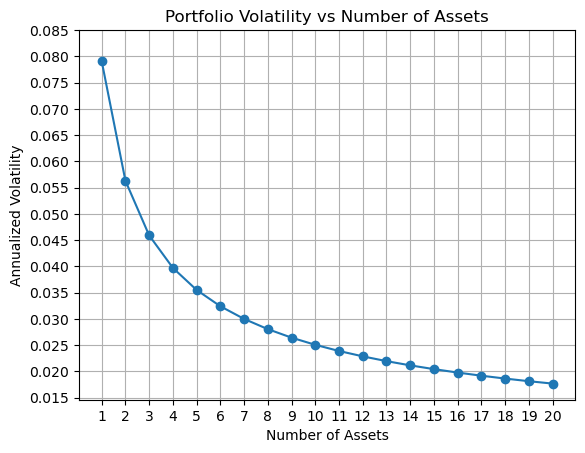

In [38]:
assets = [primary_returns, second_asset_orthogonal, third_asset]
results = {
    "Number of Assets": [1, 2, 3],
    "Annual Volatility": [
        primary_returns.std() * np.sqrt(252),
        (0.5 * primary_returns + 0.5 * second_asset_orthogonal).std() * np.sqrt(252),
        (1/3 * primary_returns + 1/3 * second_asset_orthogonal + 1/3 * third_asset).std() * np.sqrt(252),
    ]
}

for num_assets in range(4, 21):
    while len(assets) < num_assets:
        new_asset = generate_orthogonal_asset(assets, mean_daily_return, daily_volatility, num_days)
        assets.append(new_asset)

    weights = np.ones(len(assets)) / len(assets)
    portfolio_returns = sum(weight * asset for weight, asset in zip(weights, assets))
    results["Number of Assets"].append(num_assets)
    results["Annual Volatility"].append(portfolio_returns.std() * np.sqrt(252))

# Convert results to DataFrame and plot
df = pd.DataFrame(results)

plt.plot(df["Number of Assets"], df["Annual Volatility"], marker='o')
plt.xticks(ticks=results["Number of Assets"])
plt.yticks(ticks=np.arange(0.015, 0.085, 0.005))
plt.xlabel("Number of Assets")
plt.ylabel("Annualized Volatility")
plt.title("Portfolio Volatility vs Number of Assets")
plt.grid()
plt.show()


In [39]:
df.set_index("Number of Assets").round(3)

,Annual Volatility
Number of Assets,
1,0.079
2,0.056
3,0.046
4,0.040
5,0.036
6,0.032
7,0.030
8,0.028
9,0.026
